# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


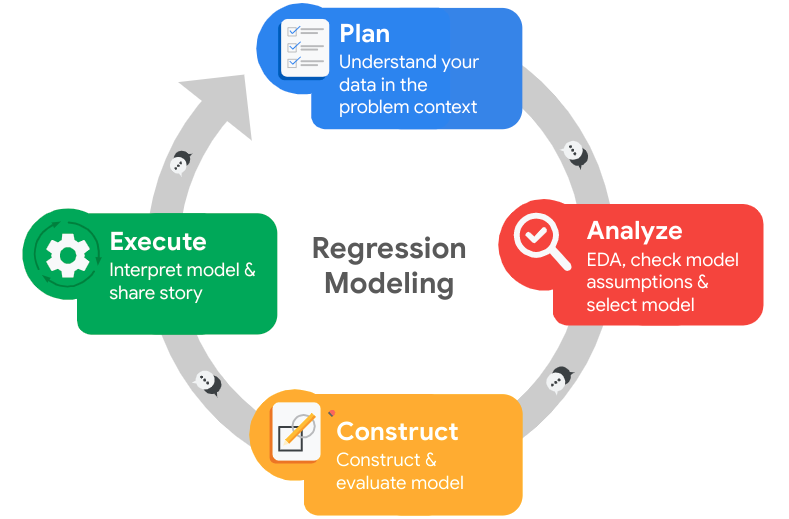

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. The Executives and the HR department are the main stakeholders.
2. Trying to predict whether an employee will churn or not.
3. Try to understand which features are important towards employee's retention
4. Stackoverflow for more information on how to plot graphs, Matplotlib and seaborn libraries documentation as well.
5. The HR department is only considering churn because of costly business decisions, and being able to identify whether an employee will churn or not will result in divulging the employee's privacy to the HR. The employee may feel like they are tracked and will be unhappy to continue working in such a company.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [58]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import plot_tree

#Metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from xgboost import XGBClassifier
from xgboost import plot_importance

import time

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns={'Work_accident': 'work_accident', 'average_montly_hours': 'average_monthly_hours', 'Department': 'department'}, inplace=True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
dupes_df = df0.duplicated(keep=False)
df0[dupes_df]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[dupes_df].sort_values(by=['satisfaction_level', 'last_evaluation'])

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
30,0.09,0.62,6,294,4,0,1,0,accounting,low
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
71,0.09,0.77,5,275,4,0,1,0,product_mng,medium
652,0.09,0.77,6,290,4,0,1,0,technical,medium
...,...,...,...,...,...,...,...,...,...,...
13089,1.00,0.88,6,201,4,0,0,0,technical,low
10691,1.00,0.93,5,231,2,0,0,0,marketing,medium
11375,1.00,0.93,5,167,3,0,0,0,sales,medium
12902,1.00,0.93,5,231,2,0,0,0,marketing,medium


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates(keep='first').reset_index(drop=True)

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

In [11]:
df1.shape

(11991, 10)

Text(0.5, 1.0, 'Boxplot of Tenure')

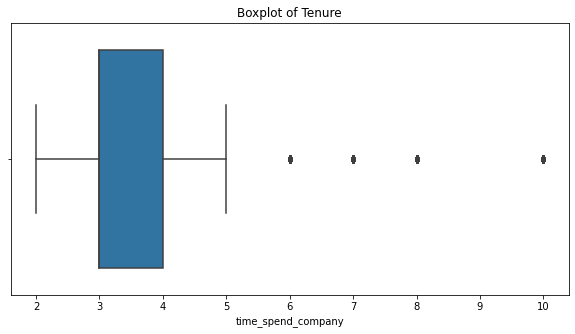

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
fig = plt.figure(figsize=(10, 5))
sns.boxplot(data=df1, x="time_spend_company")
plt.title('Boxplot of Tenure')

In [13]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

q3 = df1['time_spend_company'].quantile(0.75)
q1 = df1['time_spend_company'].quantile(0.25)
iqr = q3 - q1
upper_threshold = q3 + 1.5*iqr
bottom_threshold = q1 - 1.5*iqr

df1[(df1['time_spend_company'] > upper_threshold) | (df1['time_spend_company'] < bottom_threshold)].shape[0]

824

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(f"The number of people who left is {df1['left'].value_counts()[0]}, and the number of people remained is {df1['left'].value_counts()[1]}")

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts()/ df1.shape[0])

The number of people who left is 10000, and the number of people remained is 1991
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

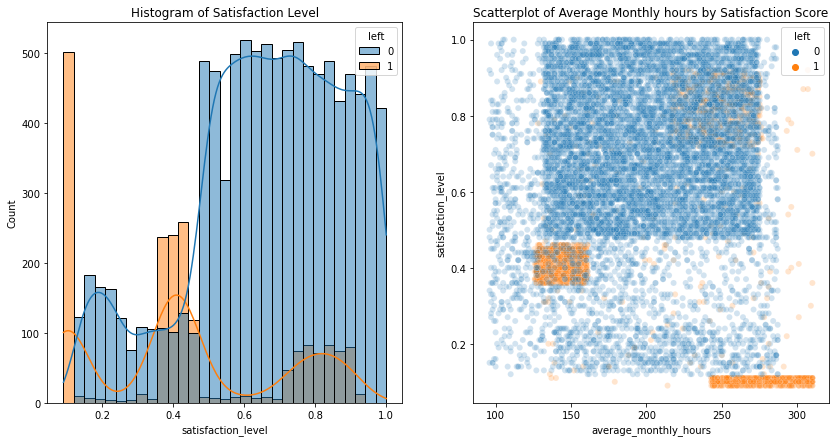

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###
# Histogram but with hue by salary which is categorical
fig, ax = plt.subplots(1, 2, figsize=(14,7))

sns.histplot(data=df1, x='satisfaction_level', hue='left', kde=True, ax=ax[0])
ax[0].set_title('Histogram of Satisfaction Level')

sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.2, ax=ax[1])
ax[1].set_title('Scatterplot of Average Monthly hours by Satisfaction Score')

plt.show()

__Observations__:

We see that there are 3 specific peaks for leavers, around 0, 0.4 and 0.8. In contrast, for non-leavers, there are two clear regions around 0.2 and 0.6 to 1.0.

We see there is an clear distinction that those who work between 240 hours and 300 hours have a low satisfaction score below 0.2, which corresponds to the long bar to the left of histogram.

The second clear group is those that work normal hours between 130 to 160, with a satisfaction score around 0.4. These might be employees who saw the other employees working overtime and decided to leave.

The final group are those with higher satisfaction level between 0.7 to 0.9 but work slightly higher hours between 220 to 270 hours.

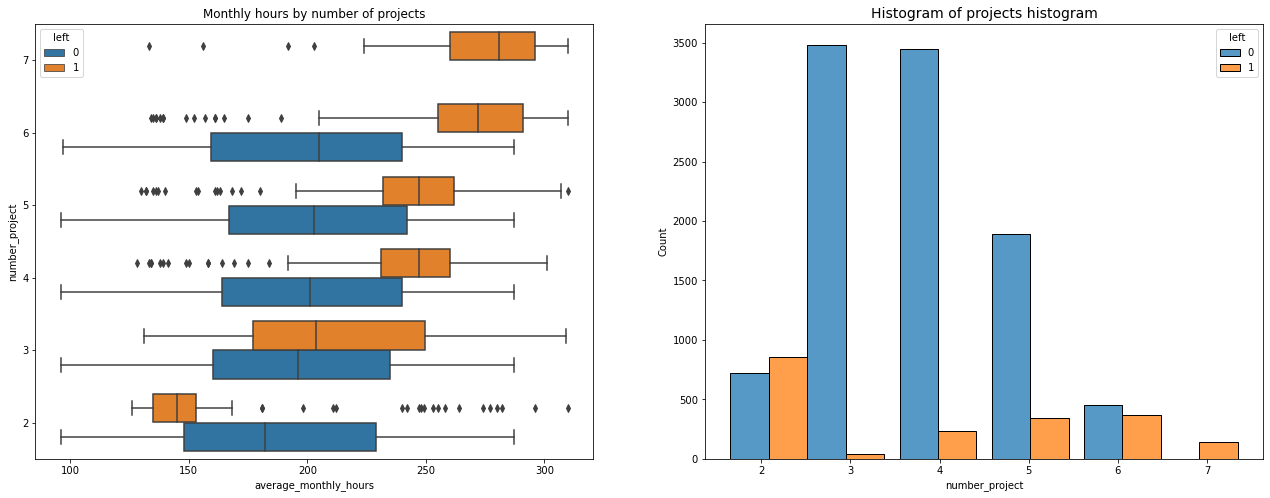

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Create boxplot showing average monthly hours for number of projects
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].set_title("Monthly hours by number of projects")
ax[0].invert_yaxis()

# Create histogram of distribution of number project
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Histogram of projects histogram', fontsize='14')

# Display the plots
plt.show()

__Observations__:

We can surmise that as the number of projects increase, so do the average monthly hours as the graph slowly shifts to the left with each increase in project. For monthly hours by number of projects, we see that a larger proportion of leavers of those who handle multiple projects are those that have a higher average monthly hours, above 225 hours.

We can see that there are two groups:
- Those who have less projects and less monthly hours could be those that were fired, or on the path of being fired as they were given less projects to work with
- Those who worked 7 projects all left. Those who worked for 6 projects and have a range between 255 hours onwards all quit.

Assuming that an average daily hours is 8 hours, and every employee works 5 days a week, then yearly average monthly hours would be 8 * 5 = 40 hours a week, and 40 * 50 = 200 hours per week. We see that a large proportion of employees worked beyond 200 hours. The company's workers are severely overworked.

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
df1[df1['number_project'] == 7]['left'].value_counts()

1    145
Name: left, dtype: int64

__Observations__: We can confirm that all employees who took on 7 projects left.

Text(0.5, 1.0, 'Histogram of tenure')

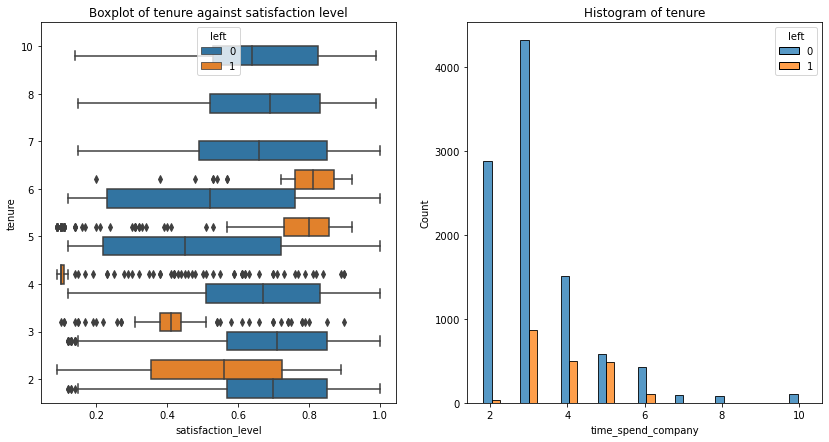

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
# Consider now the tenure in company to departure

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

sns.boxplot(data=df1, x='satisfaction_level', y="time_spend_company", hue='left', orient='h', ax=ax[0])
ax[0].set_title('Boxplot of tenure against satisfaction level')
ax[0].set_ylabel('tenure')
ax[0].invert_yaxis()

sns.histplot(data=df1, x="time_spend_company", hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Histogram of tenure')

__Observations__: 

There are two clear distinctions once again.
- Employees who have low satisfaction level at low tenure in the company
- Employees who have higher satisfaction level after 5-6 years.

Those who stayed longer tend to not leave the company with decent satisfaction level. These might be highly paid executives.

([<matplotlib.axis.XTick at 0x7a0266fd0650>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

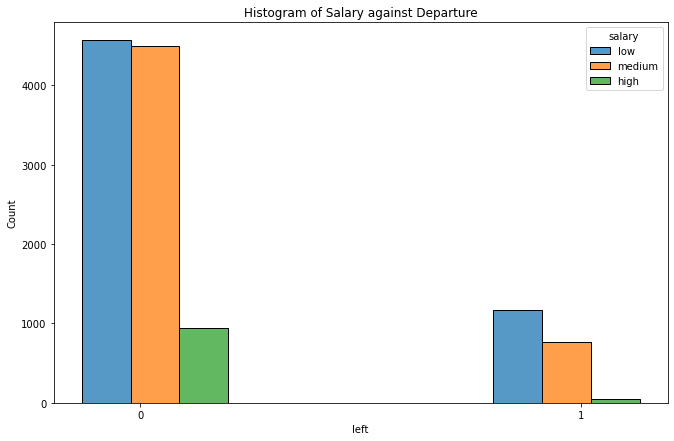

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
# Consider now the salary vs the departure and tenure

fig = plt.figure(figsize=(11, 7))

sns.histplot(data=df1, x="left", hue='salary', multiple='dodge', shrink=5)
plt.title('Histogram of Salary against Departure')
plt.xticks(ticks=[0, 1], labels=[0, 1])

__Observations:__

We can see that there is no deviation in salary distribution between thow who stay and left. We see that there are people who left regardless of salary range.

In [20]:
df1.groupby(['left','promotion_last_5years']).size().unstack()

promotion_last_5years,0,1
left,,
0,9805,195
1,1983,8


__Observations__: We can see that the number of leavers who have had promotion the last 5 years is low, as opposed to those who  remained in employment but left.

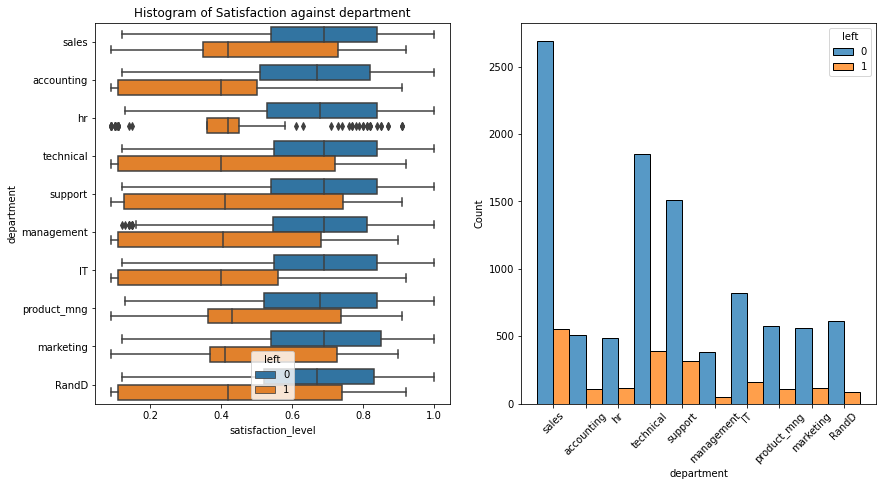

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
# Consider the department the employee is in versus the satisfaction level
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

sns.boxplot(data=df1, x="satisfaction_level", y='department', hue='left', ax=ax[0])
ax[0].set_title('Histogram of Satisfaction against department')

sns.histplot(data=df1, x='department', hue='left', discrete=1, multiple="dodge", ax=ax[1])
ax[1].tick_params(axis='x', rotation=45)

__Observations__:

All departments have had their fair share of leavers. HR has the shortest IQR, but also the most number of outliers.

Text(0.5, 1.0, 'Heatmap of correlation of features')

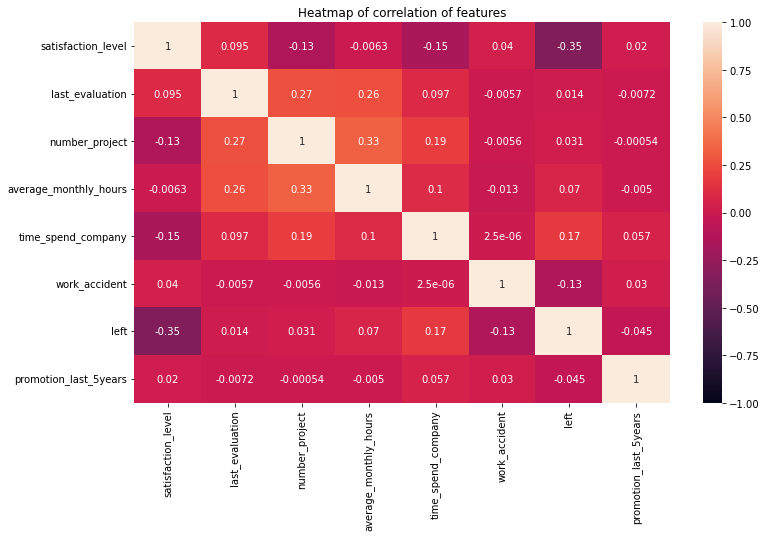

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
# Check the correlation across all variables

fig = plt.figure(figsize=(12,7))
sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Heatmap of correlation of features')

__Observations:__

We can see that there is positive correlation between number_project, last_evaluation and average_monthly hours. Conversely, we can see satisfaction_level negatively corresponds to departure.

### Insights

It appears that the employees are leaving due to the workplace being terrible with signs of overwork and mismanagement of work scope. This could be attributed to high number of projects, poor evaluation skills and long hours of work. It shows that most employees will leave once they hit 7 projects on hand. If the employees tend to stay after 6 years though, they do not leave.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The goal of the task is to predict if an employee will leave or not, which corresponds to 1 for departure and 0 for staying. This makes it a binary classification task.

### Identify the types of models most appropriate for this task.

For classification, we can utilise either Logistic regression models or Tree-based models. 

### Modeling

Add as many cells as you need to conduct the modeling process.

### Exploring modeling

### Encoding

In [23]:
# display categorical variables
df1.dtypes == 'object'

satisfaction_level       False
last_evaluation          False
number_project           False
average_monthly_hours    False
time_spend_company       False
work_accident            False
left                     False
promotion_last_5years    False
department                True
salary                    True
dtype: bool

In [24]:
df1.department.nunique()

10

In [25]:
df1.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [26]:
# Ordinal encode for salary
def ordinal_encode(sal):
    if sal == 'low':
        return 1
    elif sal == 'medium':
        return 2
    elif sal == 'high':
        return 3
    
dataset = df1.copy()
dataset['salary'] = dataset['salary'].apply(ordinal_encode)

In [27]:
# One-hot encoding for department

dataset = pd.get_dummies(dataset, columns=['department'], drop_first=False)
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [28]:
# check all datatypes are numerical
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   number_project          11991 non-null  int64  
 3   average_monthly_hours   11991 non-null  int64  
 4   time_spend_company      11991 non-null  int64  
 5   work_accident           11991 non-null  int64  
 6   left                    11991 non-null  int64  
 7   promotion_last_5years   11991 non-null  int64  
 8   salary                  11991 non-null  int64  
 9   department_IT           11991 non-null  uint8  
 10  department_RandD        11991 non-null  uint8  
 11  department_accounting   11991 non-null  uint8  
 12  department_hr           11991 non-null  uint8  
 13  department_management   11991 non-null  uint8  
 14  department_marketing    11991 non-null

### Logistic Regression

In [29]:
# Based on previous graph, we can see the clear divide between tenure of more than 6 years and less than 6 years
logreg_df = dataset[(dataset['time_spend_company'] <= upper_threshold) | (dataset['time_spend_company'] >= bottom_threshold) ]

In [30]:
# Set independant and dependant variables
y = logreg_df['left']
X = logreg_df.drop(columns=['left'])

# train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [31]:
print(f"Shape of X training data is {X_train.shape}")
print(f"Shape of y training data is {y_train.shape}")
print(f"Shape of X testing data is {X_test.shape}")
print(f"Shape of y testing data is {y_test.shape}")

Shape of X training data is (8993, 18)
Shape of y training data is (8993,)
Shape of X testing data is (2998, 18)
Shape of y testing data is (2998,)


In [32]:
# Construct Logistic Regression
lr = LogisticRegression(random_state=42)

# set hyperparameters
cv_param = {
    'solver' : ['liblinear', 'lbfgs', 'sag'],
    'C': [0.001, 0.01, 0.02, 0.05],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 300, 500]
}

scoring = ['accuracy', 'precision', 'recall', 'f1']

lr_cv = GridSearchCV(estimator=lr, param_grid=cv_param, cv=5, scoring=scoring, n_jobs=-1, refit="precision", verbose=1)
t0 = time.time()
lr_cv.fit(X_train, y_train)
t1 = time.time()
print("Took 0.2%f seconds"%(t1-t0))

print("tuned hyperparameters: (best parameters) ", lr_cv.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:   50.4s


Took 0.264.015328 seconds
tuned hyperparameters: (best parameters)  {'C': 0.05, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.1min finished


In [33]:
# Declare as a model and calculate the scores
lm = LogisticRegression(solver='liblinear', C=0.05, penalty='l1', max_iter=100)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

# Evaluate results
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

results = pd.DataFrame([['LogisticRegression', acc, prec, rec, f1, roc]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

results = results.sort_values(['Accuracy', 'Precision', 'Recall'], ascending=False)

In [34]:
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,LogisticRegression,0.834556,0.506098,0.166667,0.250755,0.567133


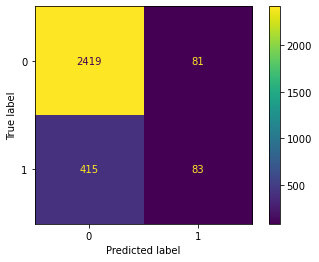

In [35]:
# Create a confusion matrix to compare
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=lm.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=lm.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

__Observations:__

We see that there is
- 2418 correctly predicted True Negatives, or employees that are recognised to stay
- 82 incorrectly predicted False Positives, or employees that were predicted to left but still stayed
- 415 incorrectly predicted False Negatives, or employees that were predicted to stay but still left
- 83 correctly predicted True Positives, or employees that were recognised to leave

In [36]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.85      0.97      0.91      2500
    Predicted would leave       0.51      0.17      0.25       498

                 accuracy                           0.83      2998
                macro avg       0.68      0.57      0.58      2998
             weighted avg       0.80      0.83      0.80      2998



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

### Decision Tree

In [37]:
# Set independant and dependant variables
y = dataset['left']
X = dataset.drop(columns=['left'])

# train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [38]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[2, 4, 6, 8, None],
             'min_samples_leaf': [1, 2, 3, 5],
             'min_samples_split': [2, 4, 6]
             }

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

tree_cv = GridSearchCV(tree, cv_params, scoring=scoring, cv=5, refit='precision', verbose=1, n_jobs=-1)
t0 = time.time()
tree_cv.fit(X_train, y_train)
t1 = time.time()
print("Took 0.2%f seconds"%(t1-t0))

print("tuned hyperparameters: (best parameters) ", tree_cv.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    3.0s


Took 0.24.669648 seconds
tuned hyperparameters: (best parameters)  {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    4.6s finished


In [39]:
# Declare as a model and calculate the scores
tree_r = DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=2)
tree_r.fit(X_train, y_train)

y_pred = tree_r.predict(X_test)

# Evaluate results
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, roc]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
results = pd.concat([results, model_results], ignore_index = True)

results = results.sort_values(['Accuracy', 'Precision', 'Recall'], ascending=False)

In [40]:
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
1,Decision Tree,0.983989,0.972689,0.929719,0.950719,0.962259
0,LogisticRegression,0.834556,0.506098,0.166667,0.250755,0.567133


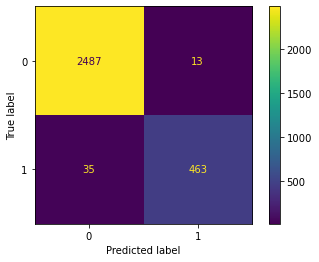

In [41]:
# Create a confusion matrix to compare
# Compute values for confusion matrix
tree_cm = confusion_matrix(y_test, y_pred, labels=tree_r.classes_)

# Create display of confusion matrix
tree_disp = ConfusionMatrixDisplay(confusion_matrix=tree_cm, 
                                  display_labels=tree_r.classes_)

# Plot confusion matrix
tree_disp.plot(values_format='')

# Display plot
plt.show()

__Observations:__

We see that there is
- 2487 correctly predicted True Negatives, or employees that are recognised to stay
- 13 incorrectly predicted False Positives, or employees that were predicted to left but still stayed
- 37 incorrectly predicted False Negatives, or employees that were predicted to stay but still left
- 461 correctly predicted True Positives, or employees that were recognised to leave

In all areas the Decision Tree has better predictions than the Logistic Regression. However, Decision Trees are more prone to overfitting. We can explore further with Random Forest Classifier.

### Random Forest

In [42]:
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [2, 3, 5, None], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [100, 300, 500],
             }  
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='precision', verbose=1, n_jobs=-1)
t0 = time.time()
rf_cv.fit(X_train, y_train)
t1 = time.time()
print("Took 0.2%f seconds"%(t1-t0))

print("tuned hyperparameters: (best parameters) ", rf_cv.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  8.0min finished


Took 0.2478.375686 seconds
tuned hyperparameters: (best parameters)  {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [43]:
# Declare as a model and calculate the scores
rf_r = RandomForestClassifier(max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
rf_r.fit(X_train, y_train)

y_pred = rf_r.predict(X_test)

# Evaluate results
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, roc]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
results = pd.concat([results, model_results], ignore_index = True)

results = results.sort_values(['Accuracy', 'Precision', 'Recall'], ascending=False)

In [44]:
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Decision Tree,0.983989,0.972689,0.929719,0.950719,0.962259
2,Random Forest,0.845897,1.000000,0.072289,0.134831,0.536145
1,LogisticRegression,0.834556,0.506098,0.166667,0.250755,0.567133


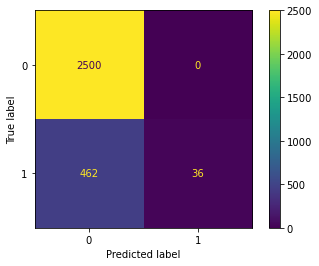

In [45]:
# Create a confusion matrix to compare
# Compute values for confusion matrix
rf_cm = confusion_matrix(y_test, y_pred, labels=rf_r.classes_)

# Create display of confusion matrix
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, 
                                  display_labels=rf_r.classes_)

# Plot confusion matrix
rf_disp.plot(values_format='')

# Display plot
plt.show()

__Observations:__

We see that there is
- 2500 correctly predicted True Negatives, or employees that are recognised to stay
- 0 incorrectly predicted False Positives, or employees that were predicted to left but still stayed
- 462 incorrectly predicted False Negatives, or employees that were predicted to stay but still left
- 36 correctly predicted True Positives, or employees that were recognised to leave

In all areas the Decision Tree has better predictions than the Logistic Regression. It is able to correctly eliminate all False Positives. However, compared to Decision Tree, it did worse in predicting True Positives, with a higher number in False Negatives.

Of the 3 models we have tested, Decision Tree ended up being the strongest model.

### Feature Engineering

When considering the data, we need to be mindful of Data Leakage. Data leakage occurs when data is used for training model when it should not be, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed. Consider the various features available in the dataset:

We cannot presume that all employees will provide a satisfaction score, or that HR will obtain a reliable satisfaction score all the time. Similarly, as we surmised earlier, the average monthly hours worked could be influenced by the departure or imminent departure of the employees as they are allocated less projects.

An option would be to drop the satisfaction_level score and use a binary category called "overwork". Since we can estimate an average week of work to be 40 hours, and with 50 weeks a year, then we can estimate that 166.67 monthly hours is what an average worker will be working for a company.

In [46]:
# Create overworked column
dataset['overworked'] = dataset['average_monthly_hours']

# We assume that more than 175 hours means overworked
def remap_satisfaction(level):
    if level > 175:
        return 1
    else:
        return 0
    
dataset['overworked'] = dataset['overworked'].apply(remap_satisfaction).astype(int)

In [47]:
# drop both columns
dataset = dataset.drop(columns=['satisfaction_level', 'average_monthly_hours'])

In [48]:
# Set independant and dependant variables
y = dataset['left']
X = dataset.drop(columns=['left'])

# train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

#### Decision Tree round 2

In [49]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[2, 4, 6, 8, None],
             'min_samples_leaf': [1, 2, 3, 5],
             'min_samples_split': [2, 4, 6]
             }

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

tree_cv = GridSearchCV(tree, cv_params, scoring=scoring, cv=5, refit='precision', verbose=1, n_jobs=-1)
t0 = time.time()
tree_cv.fit(X_train, y_train)
t1 = time.time()
print("Took 0.2%f seconds"%(t1-t0))

print("tuned hyperparameters: (best parameters) ", tree_cv.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    2.4s


Took 0.23.727462 seconds
tuned hyperparameters: (best parameters)  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.7s finished


In [50]:
# Declare as a model and calculate the scores
tree_r = DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=2)
tree_r.fit(X_train, y_train)

y_pred = tree_r.predict(X_test)

# Evaluate results
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

model_results = pd.DataFrame([['Decision Tree v2', acc, prec, rec, f1, roc]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
results = pd.concat([results, model_results], ignore_index = True)

results = results.sort_values(['Accuracy', 'Precision', 'Recall'], ascending=False)

In [51]:
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Decision Tree,0.983989,0.972689,0.929719,0.950719,0.962259
3,Decision Tree v2,0.957305,0.888655,0.849398,0.868583,0.914099
1,Random Forest,0.845897,1.000000,0.072289,0.134831,0.536145
2,LogisticRegression,0.834556,0.506098,0.166667,0.250755,0.567133


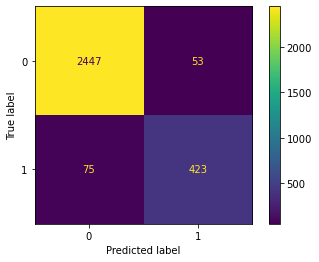

In [52]:
# Create a confusion matrix to compare
# Compute values for confusion matrix
tree_cm = confusion_matrix(y_test, y_pred, labels=tree_r.classes_)

# Create display of confusion matrix
tree_disp = ConfusionMatrixDisplay(confusion_matrix=tree_cm, 
                                  display_labels=tree_r.classes_)

# Plot confusion matrix
tree_disp.plot(values_format='')

# Display plot
plt.show()

__Observations:__

We see that there is
- 2447 correctly predicted True Negatives, or employees that are recognised to stay
- 53 incorrectly predicted False Positives, or employees that were predicted to left but still stayed
- 75 incorrectly predicted False Negatives, or employees that were predicted to stay but still left
- 423 correctly predicted True Positives, or employees that were recognised to leave

We see that the scores of Decision Tree has dropped across board, but the results are still very good. This is reasonable given the loss of features.

### Random Forest v2

In [53]:
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [2, 3, 5, None], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [100, 300, 500],
             }  
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='precision', verbose=1, n_jobs=-1)
t0 = time.time()
rf_cv.fit(X_train, y_train)
t1 = time.time()
print("Took 0.2%f seconds"%(t1-t0))

print("tuned hyperparameters: (best parameters) ", rf_cv.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  7.3min finished


Took 0.2436.875387 seconds
tuned hyperparameters: (best parameters)  {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [54]:
# Declare as a model and calculate the scores
rf_r = RandomForestClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100)
rf_r.fit(X_train, y_train)

y_pred = rf_r.predict(X_test)

# Evaluate results
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest 2', acc, prec, rec, f1, roc]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
results = pd.concat([results, model_results], ignore_index = True)

results = results.sort_values(['Accuracy', 'Precision', 'Recall'], ascending=False)

In [55]:
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Decision Tree,0.983989,0.972689,0.929719,0.950719,0.962259
1,Decision Tree v2,0.957305,0.888655,0.849398,0.868583,0.914099
4,Random Forest 2,0.894930,0.914027,0.405622,0.561892,0.699011
2,Random Forest,0.845897,1.000000,0.072289,0.134831,0.536145
3,LogisticRegression,0.834556,0.506098,0.166667,0.250755,0.567133


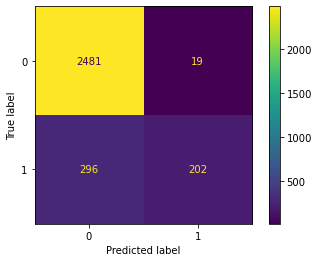

In [56]:
# Create a confusion matrix to compare
# Compute values for confusion matrix
rf_cm = confusion_matrix(y_test, y_pred, labels=rf_r.classes_)

# Create display of confusion matrix
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, 
                                  display_labels=rf_r.classes_)

# Plot confusion matrix
rf_disp.plot(values_format='')

# Display plot
plt.show()

__Observations:__

We see that there is
- 2481 correctly predicted True Negatives, or employees that are recognised to stay
- 19 incorrectly predicted False Positives, or employees that were predicted to left but still stayed
- 296 incorrectly predicted False Negatives, or employees that were predicted to stay but still left
- 202 correctly predicted True Positives, or employees that were recognised to leave


We see that the Random Forest v2 is better than the original Random forest in terms of accuracy. However, it still performs worse on False Negatives compared to Decision Trees.

### Decision Tree Splits

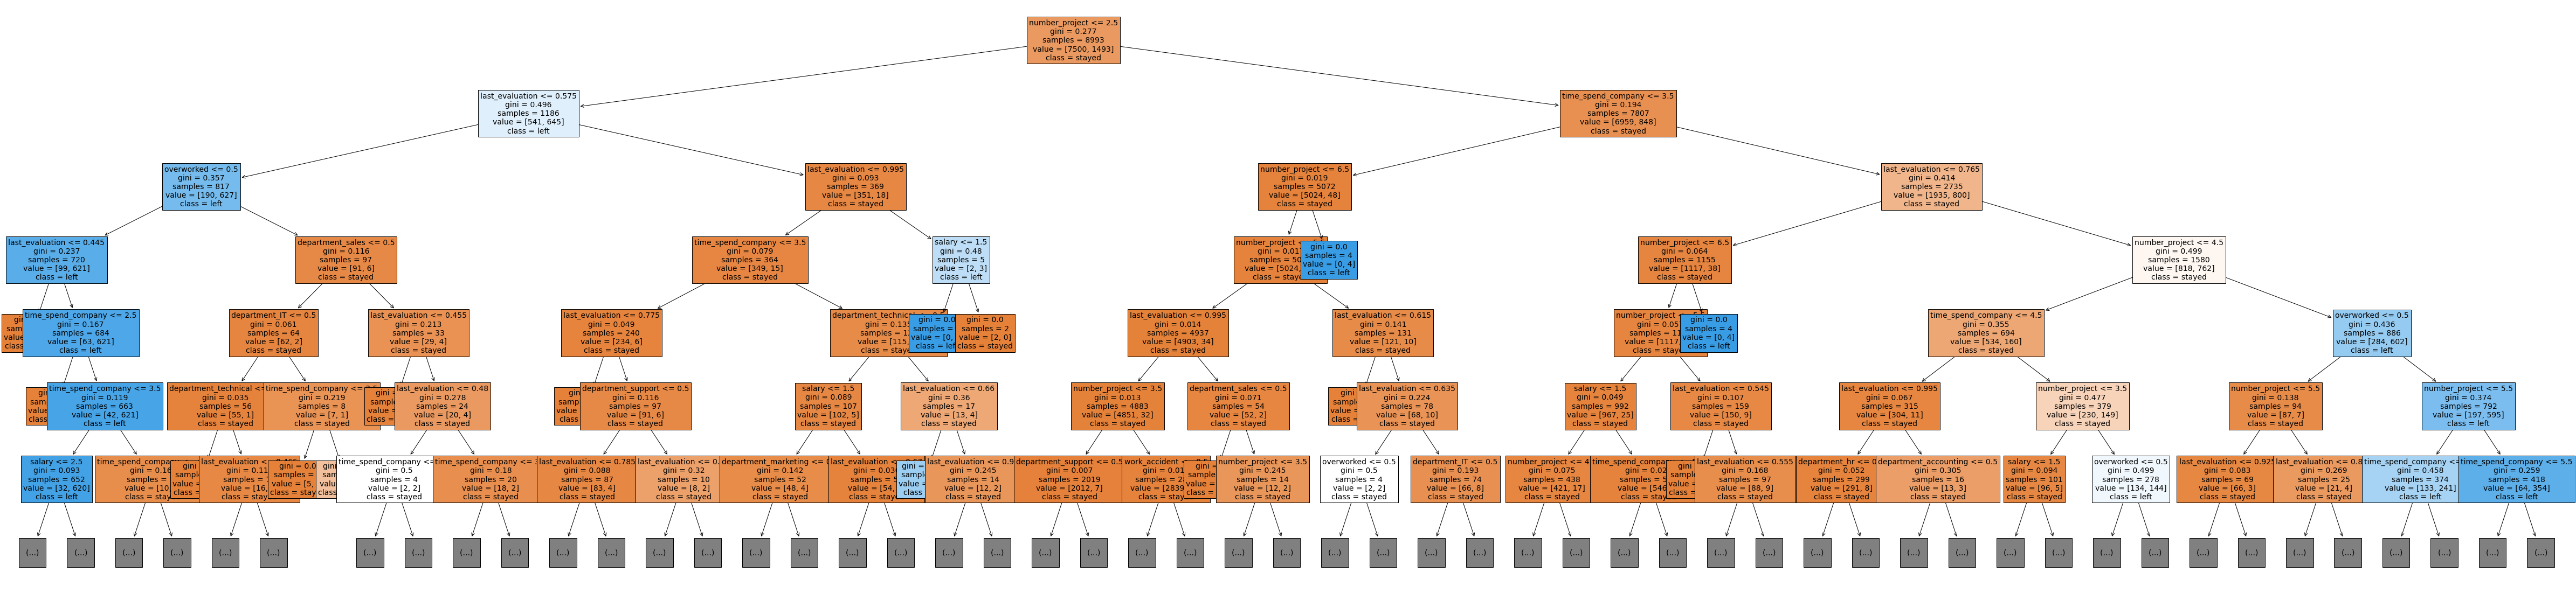

In [59]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree_cv.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

### Decision Tree Feature Importance

In [60]:
# investigate what are the important features
tree2_importances = pd.DataFrame(tree_cv.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.334804
number_project,0.278637
time_spend_company,0.233564
overworked,0.102615
salary,0.015676
department_sales,0.008270
department_technical,0.005867
work_accident,0.005380
department_support,0.003575
department_accounting,0.002175


Text(0.5, 1.0, 'Feature importance of decision tree')

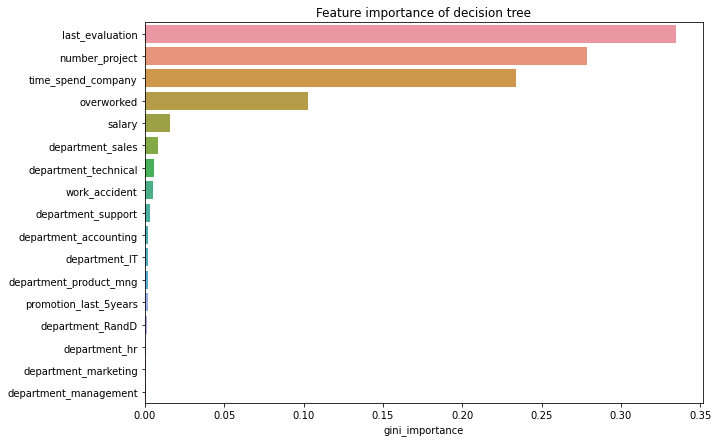

In [63]:
# Plotting by importances
fig = plt.figure(figsize=(10,7))
sns.barplot(data=tree2_importances, y=tree2_importances.index, x='gini_importance', orient='h')

plt.title('Feature importance of decision tree')

__Observations__:
    
We are able to know that the most important features are `last_evaluation`, `number_project`, `time_spend_company` in order of importance.

### Random Forest Feature Importance

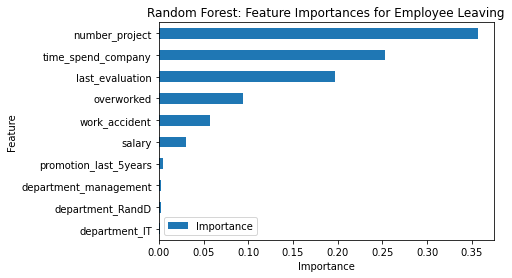

In [64]:
# Get feature importances
feat_impt = rf_cv.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf_cv.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

__Observations__:

The plot above shows that `number_project`, `time_spend_company` (tenure), `last_evaluation` are the most important features in order of importance.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. Was able to determine that the workers did not feel appreciated in the company based on past poor evaluation scores, are overworked and yet not rewarded.
2. There should be an overhaul of the workload management and proper rewards and recognition system put into place.
3. Identify those who are working on multiple projects and allocate more resources to them.
4. The model can be improved. For example, we discover that the satisfaction score was split into three distinct peaks. These can be identified and maybe updated to an ordinal score, and transform together with the `left` column to form a new measurement.
5. I would ask for the validity of the satisfaction scores, and the accuracy of time logging for the projects. I would also inquire on the length of the projects taken by the employees. Lastly, I would ask when this set of data was taken as there could be external factors such as being year-end time and employees may have intended to leave after collecting bonus.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

##### Logistic Regression
The LR model achieved a relatively high accuracy of 83.4% while it is still the lowest amongst all tested models. It was not able to achieve decent recall, f1 or precision score in comparison.

##### Tree based machine learning
The Decision tree model was able to achieve a high accuracy of 98.3%, Precision of 97.2%, recall of 92.9% and F1 score of 95.1% making it the best amongst all the tree based models, beating even random forest. From the feature importance of both Random forest and Decision Tree, we can surmise that the Random Forest performs slightly worse as it picked up the wrong feature to perform splits on.

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked and under appreciated.

To retain employees, the following recommendations could be presented to the stakeholders:

- Cap the number of projects that employees can work on.
- Consider promoting employees who have been with the company for at least four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
- Start a rewards program to reward employees for working longer hours, or restrict the maximum hours they can work to.
- If there are no overtime pay policies, start comparing with benchmark set by other similar companies, or mandate a maximum overtime working hours to ensure employees do not work too much.
- Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
- Stop basing high performance evaluation based on hours worked or number of projects and start rewarding based on output.

Next Steps

There are only 3 types of models being used here. There could be others such as XGBClassifer, K-Means, Naive Bayes that we can utilise which may yield other insights. In terms of data leakage, one of the concern would be the validity of the satisfaction score, as well as when evaluations / how often they are taken to determine if that is useful for predicting.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.